In [ ]:
conda config --append channels conda-forge

In [3]:
!conda install -q kaggle -y

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - kaggle


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    conda-22.9.0               |   py37h06a4308_0         878 KB
    kaggle-1.5.12              |     pyhd8ed1ab_4          53 KB  conda-forge
    python-slugify-5.0.2       |     pyhd3eb1b0_0          13 KB
    text-unidecode-1.3         |     pyhd3eb1b0_0          65 KB
    unidecode-1.2.0            |     pyhd3eb1b0_0         155 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  kaggle             conda-forge/noarch::kaggle-1.5.12-pyhd8ed1ab_4
  pyt

In [4]:
!mkdir ~/.kaggle

In [5]:
!touch ~/.kaggle/kaggle.json

In [6]:
api_token = {"username":"lakshin01","key":"7147df465321fdbfebb2363279c06f64"}

In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
import json

with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [10]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|███████████████████████████████████████| 2.29G/2.29G [00:19<00:00, 256MB/s]
100%|███████████████████████████████████████| 2.29G/2.29G [00:24<00:00, 100MB/s]


In [12]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip','r') as zip_ref:
    zip_ref.extractall('./data')

In [3]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir,condition):
    placeholder=""
    if condition=='n':
        placeholder='NORMAL'
    elif condition=='p':
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f"./data/chest_xray/{dir}/{placeholder}/*.jpeg"
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    
    for index,item in enumerate(img_paths,start=1):
        if index==randomNumber:
            print(index,item)
            image=plt.imread(item)
            readyImage=plt.imshow(image)
            plt.show()
            return readyImage



7 ./data/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg


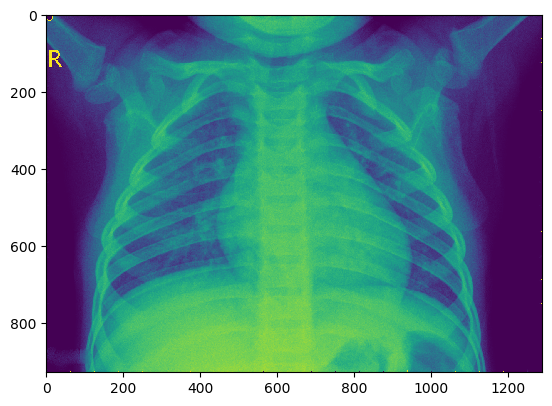

In [4]:
get_random_image("val","n")

In [5]:
from PIL import Image

image=Image.open('data/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
print(image.format,image.mode,image.size)

JPEG L (1776, 1416)


In [2]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/train/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [3]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/test/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [4]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [5]:
import glob
import pandas as pd

folder=f'./data/chest_xray/*/*.jpeg'

category=[]
filenames=[]
condition_of_lung=[]

all_files=glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())
            
        

  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


In [3]:
!conda install seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    conda-22.9.0               |   py37h06a4308_0         878 KB
    seaborn-0.12.0             |   py37h06a4308_0         430 KB
    typing_extensions-4.3.0    |   py37h06a4308_0          42 KB
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  typing_extensions  pkgs/main/linux-64::ty

In [2]:
2-3

-1

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)
#plt.show()
for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')

In [13]:
import glob
import pandas as pd
import os
train_folder='./data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

  labels                   s3_path
0      0     train_normal1203.jpeg
1      1  train_pneumonia3349.jpeg
2      1   train_pneumonia478.jpeg
3      1  train_pneumonia1567.jpeg
4      1  train_pneumonia2296.jpeg


In [14]:
import glob
import pandas as pd
import os
test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

  labels                 s3_path
0      0       test_normal4.jpeg
1      1    test_pneumonia1.jpeg
2      1  test_pneumonia359.jpeg
3      1  test_pneumonia197.jpeg
4      0     test_normal103.jpeg


In [15]:
def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )
save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

In [2]:
bucket='medical-ai-chest-xray-lakshin2'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::medical-ai-chest-xray-lakshin2'
print("roleArn:{}".format(roleArn))

bucket:medical-ai-chest-xray-lakshin2
region:us-east-1
roleArn:arn:aws:s3:::medical-ai-chest-xray-lakshin2


In [3]:
import os
os.environ["DEFAULT_S3_BUCKET"]=bucket

In [37]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/

upload: data/chest_xray/train/train_normal1.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal1.jpeg
upload: data/chest_xray/train/train_normal100.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal100.jpeg
upload: data/chest_xray/train/train_normal0.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal0.jpeg
upload: data/chest_xray/train/train_normal1005.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal1005.jpeg
upload: data/chest_xray/train/train_normal10.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal10.jpeg
upload: data/chest_xray/train/train_normal1000.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal1000.jpeg
upload: data/chest_xray/train/train_normal1006.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal1006.jpeg
upload: data/chest_xray/train/train_normal1013.jpeg to s3://medical-ai-chest-xray-lakshin2/train/train_normal1013.jpeg
upload: data/chest_xray/train/train_normal1003.jpeg to s3://medica

In [38]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/

upload: data/chest_xray/test/test_normal0.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal0.jpeg
upload: data/chest_xray/test/test_normal100.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal100.jpeg
upload: data/chest_xray/test/test_normal102.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal102.jpeg
upload: data/chest_xray/test/test_normal110.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal110.jpeg
upload: data/chest_xray/test/test_normal101.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal101.jpeg
upload: data/chest_xray/test/test_normal108.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal108.jpeg
upload: data/chest_xray/test/test_normal10.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal10.jpeg
upload: data/chest_xray/test/test_normal103.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_normal103.jpeg
upload: data/chest_xray/test/test_normal104.jpeg to s3://medical-ai-chest-xray-lakshin2/test/test_norm

In [4]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [2]:
!pip install sagemaker

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 592.4/592.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 132.5/132.5 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 79.8/79.8 kB ? eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 37.2 MB/s eta 0:00:00
     ---------------------------------------- 79.6/79.6 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 52.8/52.8 kB ? eta 0:00:00
     ---------------------------------------- 132.9/132.9 kB ? eta 0:00:00
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Created wheel for sagemaker: filename=sagemaker-2.116.0-py2.py3-none-any.whl size=809052 sha256=12128874a2e59e7cfd376720

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.18.4 requires urllib3<1.23,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
tb-nightly 2.10.0a20220811 requires requests<3,>=2.21.0, but you have requests 2.18.4 which is incompatible.


In [40]:
boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

In [3]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

ValueError: Must setup local AWS configuration with a region supported by SageMaker.

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [5]:
role=get_execution_role()
print(role)

arn:aws:iam::414556926529:role/service-role/AmazonSageMaker-ExecutionRole-20221102T221681


In [7]:
import sagemaker
#when instance type has p then it has a GPU on it, so it will be super fast computation for the training
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge",
    volume_size=50,
    max_run=432000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess
)
print(img_classifier_model)

In [7]:
import glob 
count=0

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

5216


In [45]:
count=5216

In [8]:
img_classifier_model.set_hyperparameters(
image_shape='3,224,224',
num_classes=2,
use_pretrained_model=1,
num_training_samples=count,
augmentation_type='crop_color_transform',
epochs=15,
early_stopping=True,
early_stopping_min_epochs=8,
early_stopping_tolerance=0.0,
early_stopping_patience=5,
lr_scheduler_factor=0.1,
lr_scheduler_step='8,10,12')

In [9]:
from sagemaker.tuner import CategoricalParameter,ContinuousParameter,HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd","adam"])
}
# Read gradient descent and choose hyper paramenters wisely
## there is a reson to go for lower epochs for hitting 80% instead of 90%s

In [10]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1

In [49]:
tuner=HyperparameterTuner(estimator=img_classifier_model,
                         objective_metric_name=objective_metric_name,
                         hyperparameter_ranges=hyperparameter_ranges,
                         objective_type=objective_type,
                         max_jobs=max_jobs,
                         max_parallel_jobs=max_parallel_jobs  
                         )

In [50]:
from sagemaker.session import TrainingInput
# sagemaker calls test as validation.. no need to get confused
model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [51]:
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

In [ ]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [6]:
import sagemaker
from sagemaker import get_execution_role

In [7]:
role=get_execution_role()

In [8]:
model=sagemaker.model.Model(
image_uri=algorithm_image,
model_data='s3://medical-ai-chest-xray-lakshin2/models/image_model/classifier-2022-11-03-18-28-05-005-0e7a4416/output/model.tar.gz',
role=role)

In [ ]:
endpoint_name='Lakshin-Image-Classifier-Pneumonia5'

deployment=model.deploy(
initial_instance_count=1,
instance_type='ml.m4.xlarge',
endpoint_name=endpoint_name)

-------------

In [ ]:
from sagemaker.predictor import Predictor
predictor=Predictor("Lakshin-Image-Classifier-Pneumonia5")

In [ ]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name='data/chest_xray/val/val_pneumonia0.jpeg'

predictor.serializer= IdentitySerializer("image/jpeg")
with open(file_name,"rb")as f:
    payload=f.read()
    
inference=predictor.predict(data=payload)
print(inference)

# 0th class is normal, 1 is pneumonia

In [ ]:
print(inference[1])

In [ ]:
import glob
import json
import numpy as np
file_path='data/chest_xray/val/*.jpeg'
files=glob.glob(file_path)

y_true=[]
y_pred=[]
# json is the fn deserialization the byte array to normalarray
def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)

make_pred()
print(y_true)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true,y_pred)

# left bottom is when the false negative when indeed they have pneumonia.. left bottom 0 is very good sign 
##top p true, n true
##bot pneumonia false,  n false

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))